# 1. 해당 프로젝트는 머신러닝 다중 분류 모델을 사용하여 사용자가 선택한 설문조사에 맞춰 결과를 나타내는 프로젝트.

### 전제조건: 
- 사용자가 선택한 질문지에 대한 결과를 모두 알고 있어야 한다.
- 사용자가 선택한 결과에 대해 최종 점수를 알고 있어야 한다.

#### 특이사항
- 정형화된 데이터가 없기 때문에 필수적인 결과에 맞춰 target 을 우선 정의하고,  
이후 회사에서 원하는 결과를 비중있게 배치한 뒤 나머지는 무작위로 적용한다.

#### 구조
- react 로 화면 구성을 진행하며, 백엔드는 xx(FastAPI 또는 Django) 를 사용하여 모델을 호출하여 결과를 예측한다.
- DB 의 경우 MySQL 을 사용하며 최초 구성시에는 임의로 데이터베이스를 생성하여 해당 데이터베이스로 데이터를 저장한다.
- 분류 기반의 모델을 사용할 예정이며 질문지 구성이 정해져 있기 때문에 정확도를 높이는 방향으로 모델을 구성하기로 결정한다.

In [6]:
# 데이터세트 feature 생성하기 (질문 20개 , 종합점수 1개, target 1개)
import pandas as pd
import numpy as np

features=[f"question_{i+1}" for i in range(20)]

origin_df = pd.DataFrame(0, columns=features, index=range(1,501), dtype=int)

# 결과 확인
display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# 각 질문지에 대한 랜덤한 숫자 부여
for feature in features:
    origin_df[feature] = np.random.randint(0,4,size=len(origin_df))

display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20
1,0,0,2,2,1,1,0,3,1,3,2,3,1,1,1,0,2,2,0,1
2,0,2,0,2,0,2,0,3,3,1,0,0,1,1,3,1,0,3,2,2
3,2,1,0,1,1,2,3,2,1,3,0,1,2,0,2,0,2,2,3,3
4,2,2,0,3,0,2,2,2,0,1,1,1,0,2,2,3,1,2,2,3
5,0,1,2,3,2,3,0,0,2,3,1,3,1,0,0,2,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,3,2,3,1,1,0,0,1,0,2,1,0,0,2,2,0,3,1,3
497,2,1,2,1,3,3,1,0,1,0,3,1,1,0,3,1,3,2,3,2
498,1,1,0,0,0,1,3,3,1,3,1,2,2,2,2,3,0,0,0,1
499,0,3,1,0,2,2,2,2,2,3,2,2,0,2,0,3,2,2,1,3


In [11]:
# feature (total_score, target) 2개 추가
origin_df['total_score'] = [0] * 500
origin_df['target'] = [0] * 500

display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target
1,0,0,2,2,1,1,0,3,1,3,...,1,1,1,0,2,2,0,1,0,0
2,0,2,0,2,0,2,0,3,3,1,...,1,1,3,1,0,3,2,2,0,0
3,2,1,0,1,1,2,3,2,1,3,...,2,0,2,0,2,2,3,3,0,0
4,2,2,0,3,0,2,2,2,0,1,...,0,2,2,3,1,2,2,3,0,0
5,0,1,2,3,2,3,0,0,2,3,...,1,0,0,2,3,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,3,2,3,1,1,0,0,1,0,...,0,0,2,2,0,3,1,3,0,0
497,2,1,2,1,3,3,1,0,1,0,...,1,0,3,1,3,2,3,2,0,0
498,1,1,0,0,0,1,3,3,1,3,...,2,2,2,3,0,0,0,1,0,0
499,0,3,1,0,2,2,2,2,2,3,...,0,2,0,3,2,2,1,3,0,0


In [14]:
# 각 feature에 대한 total_score 계산
origin_df["total_score"] = origin_df.sum(axis=1)

# 점수와 total_score를 정한 데이터 프레임 copy
re_df = origin_df.copy()
re_df

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target
1,0,0,2,2,1,1,0,3,1,3,...,1,1,1,0,2,2,0,1,78,0
2,0,2,0,2,0,2,0,3,3,1,...,1,1,3,1,0,3,2,2,78,0
3,2,1,0,1,1,2,3,2,1,3,...,2,0,2,0,2,2,3,3,93,0
4,2,2,0,3,0,2,2,2,0,1,...,0,2,2,3,1,2,2,3,93,0
5,0,1,2,3,2,3,0,0,2,3,...,1,0,0,2,3,0,0,3,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,3,2,3,1,1,0,0,1,0,...,0,0,2,2,0,3,1,3,84,0
497,2,1,2,1,3,3,1,0,1,0,...,1,0,3,1,3,2,3,2,99,0
498,1,1,0,0,0,1,3,3,1,3,...,2,2,2,3,0,0,0,1,78,0
499,0,3,1,0,2,2,2,2,2,3,...,0,2,0,3,2,2,1,3,102,0


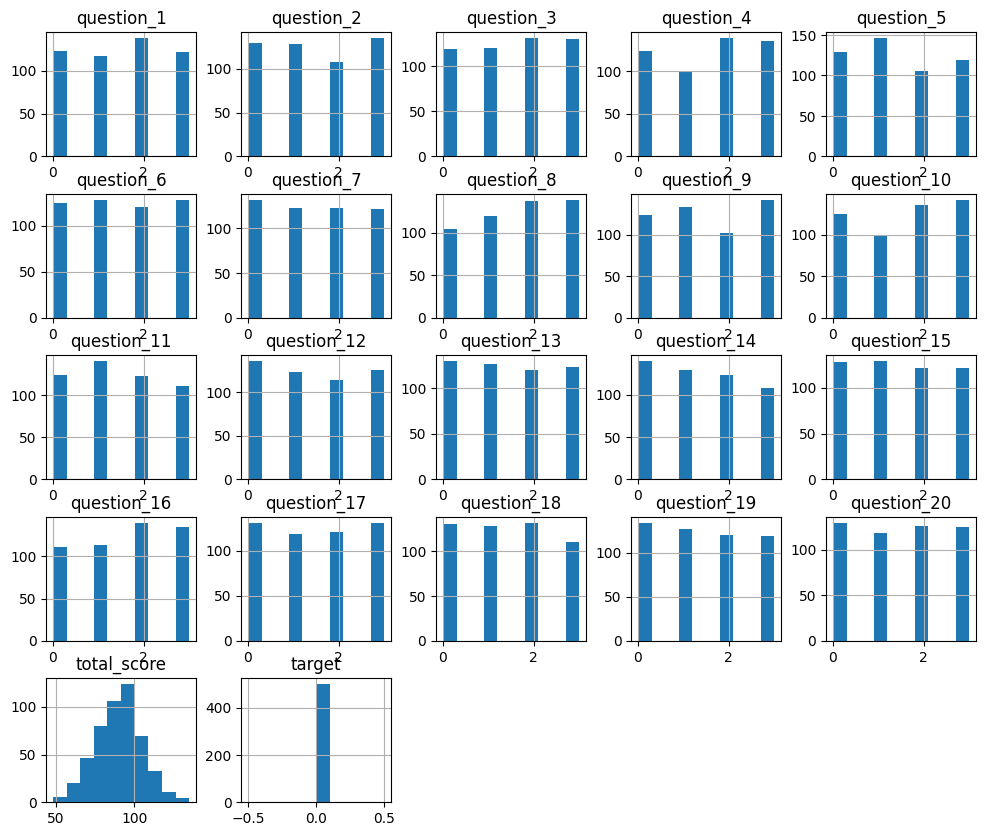

In [17]:
# 각 feature, total score 에 대한 히스토그램 확인
import matplotlib.pyplot as plt

re_df.hist(figsize=(12,10))
plt.show()

In [30]:
# 각 질문에 맞춰 결과에 대한 비중 변경
# 각 질문지에 대한 비중 설정

# 질문에 대한 선택 비중은 변경되어야 함.
weights_1 = [1,6,2,1]
weights_2 = [0.5,6,2.5,1]
weights_3 = [1,2,5,2]
weights_4 = [1,4,3,2]
weights_5 = [0.5,5.5,2,2]
weights_6 = [7,0.25,0.75,2]
weights_7 = [0.5,2,6,1.5]
weights_8 = [1.5,4,3,2]
weights_9 = [1,4,3,2]
weights_10 = [6,2,1,1]
weights_11 = [0.5,2,1.5,6]
weights_12 = [7,0.5,1.5,0.5]
weights_13 = [6,2,2,1]
weights_14 = [6,2,2,1]
weights_15 = [6,2,2,1]
weights_16 = [6,2,2,1]
weights_17 = [6,2,2,1]
weights_18 = [6,2,2,1]
weights_19 = [6,2,2,1]
weights_20 = [6,2,2,1]

proba = [w/sum(weights) for w in weights]

for i in range(20):
    re_df[f"question_{i+1}"] = np.random.choice([0,1,2,3], size=len(re_df), p=proba)

# 결과 확인
display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target
1,0,0,2,2,1,1,0,3,1,3,...,1,1,1,0,2,2,0,1,78,0
2,0,2,0,2,0,2,0,3,3,1,...,1,1,3,1,0,3,2,2,78,0
3,2,1,0,1,1,2,3,2,1,3,...,2,0,2,0,2,2,3,3,93,0
4,2,2,0,3,0,2,2,2,0,1,...,0,2,2,3,1,2,2,3,93,0
5,0,1,2,3,2,3,0,0,2,3,...,1,0,0,2,3,0,0,3,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,3,2,3,1,1,0,0,1,0,...,0,0,2,2,0,3,1,3,84,0
497,2,1,2,1,3,3,1,0,1,0,...,1,0,3,1,3,2,3,2,99,0
498,1,1,0,0,0,1,3,3,1,3,...,2,2,2,3,0,0,0,1,78,0
499,0,3,1,0,2,2,2,2,2,3,...,0,2,0,3,2,2,1,3,102,0
